# Teste t Student 
## 2 amostras independentes

- Amostras pequenas (n < 30)
- Não é necessário o conhecimento do desvio padrão

In [9]:
import pandas as pd
import numpy as np

In [10]:
enem_sp = pd.read_csv('enem_2019_tratado.csv',
                      sep=',', encoding='iso-8859-1')

In [11]:
enem_sp.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
0,"1,90E+11",Santa Isabel,22,M,1,parda,1,1,não_respondeu,NaN,...,600.2,Inglês,1.0,160.0,200.0,180.0,200.0,200.0,940.0,Sim
1,"1,90E+11",São Paulo,17,F,1,parda,1,2,privada,15567761.0,...,731.8,Inglês,1.0,160.0,120.0,200.0,200.0,200.0,880.0,Não
2,"1,90E+11",São Bernardo do Campo,19,M,1,parda,1,2,pública,35904958.0,...,393.2,Espanhol,1.0,80.0,160.0,120.0,100.0,100.0,560.0,Sim
3,"1,90E+11",Embu-Guaçu,17,F,1,parda,1,2,pública,NaN,...,419.2,Inglês,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Sim
4,"1,90E+11",Guarulhos,23,F,1,branca,1,1,não_respondeu,NaN,...,796.1,Inglês,1.0,160.0,200.0,180.0,180.0,160.0,880.0,Sim


In [12]:
colegioy = enem_sp.loc[enem_sp.CO_ESCOLA == 35151506.0]

objetivo: analisar a diferença entre as médias de dois componentes de redação do colégio Y.

In [13]:
colegioy.shape # POUCOS DADOS, utilizar o t student

(30, 28)

In [14]:
colegioy.shape

(30, 28)

Revisando passo a passo de análise
1) Analisar a classificação das variáveis
2) Analisar valores missing
3) Analisar outliers
4) Analisar Normalidade
5) Homocedasticidade

1) Analisar a classificação das variáveis

In [15]:
colegioy.dtypes

NU_INSCRICAO                object
NO_MUNICIPIO_RESIDENCIA     object
IDADE                        int64
SEXO                        object
TP_ESTADO_CIVIL              int64
RACA                        object
TP_NACIONALIDADE             int64
TP_ST_CONCLUSAO              int64
ESCOLA                      object
CO_ESCOLA                  float64
NO_MUNICIPIO_ESC            object
TP_PRESENCA_CN               int64
TP_PRESENCA_CH               int64
TP_PRESENCA_LC               int64
TP_PRESENCA_MT               int64
NOTA_CN                    float64
NOTA_CH                    float64
NOTA_LC                    float64
NOTA_MT                    float64
TP_LINGUA                   object
TP_STATUS_REDACAO          float64
COMP1                      float64
COMP2                      float64
COMP3                      float64
COMP4                      float64
COMP5                      float64
NOTA_REDACAO               float64
INTERNET                    object
dtype: object

2) Analisar valores missing

In [16]:
colegioy.isnull().sum()

NU_INSCRICAO               0
NO_MUNICIPIO_RESIDENCIA    0
IDADE                      0
SEXO                       0
TP_ESTADO_CIVIL            0
RACA                       0
TP_NACIONALIDADE           0
TP_ST_CONCLUSAO            0
ESCOLA                     0
CO_ESCOLA                  0
NO_MUNICIPIO_ESC           0
TP_PRESENCA_CN             0
TP_PRESENCA_CH             0
TP_PRESENCA_LC             0
TP_PRESENCA_MT             0
NOTA_CN                    0
NOTA_CH                    0
NOTA_LC                    0
NOTA_MT                    0
TP_LINGUA                  0
TP_STATUS_REDACAO          0
COMP1                      0
COMP2                      0
COMP3                      0
COMP4                      0
COMP5                      0
NOTA_REDACAO               0
INTERNET                   0
dtype: int64

3) Analisar outliers

In [17]:
import plotly.express as px

In [18]:
grafico = px.box(colegioy, y="COMP3")
grafico.show() # relembrando notas até 200

In [19]:
grafico = px.box(colegioy, y="COMP5")
grafico.show()

4) Analisar Normalidade

CRITÉRIOS:

Nível de significância de 0,05 ou 5% (MAIS UTILIZADO)

Quando p > 0,05 (distribuição normal)

In [20]:
import scipy.stats as stats

In [21]:
# teste Shapiro-Wilk
stats.shapiro(colegioy.COMP3) # não é normal

ShapiroResult(statistic=0.916003406047821, pvalue=0.02115193009376526)

In [25]:
# teste Shapiro-Wilk
stats.shapiro(colegioy.COMP5) # é normal

ShapiroResult(statistic=0.9479595422744751, pvalue=0.14903278648853302)

In [22]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

In [23]:
# teste Lilliefors (Kolmogorov_Sminorv)
statsmodels.stats.diagnostic.lilliefors(colegioy.COMP3, dist = 'norm')

(0.20710628123776997, 0.0022752873084563707)

vamos considerar o COMP3 sendo normal para conseguir visualizar o funcionamento do teste. 

nesse caso poderiamos utilizar um teste não paramêtrico! (não será o utilizado)

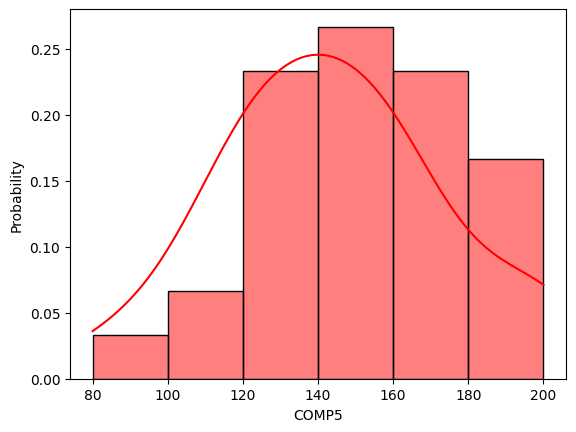

In [26]:
import seaborn as sns
sns.histplot(colegioy, x='COMP5', bins=6, color="red", kde=True, stat="probability");

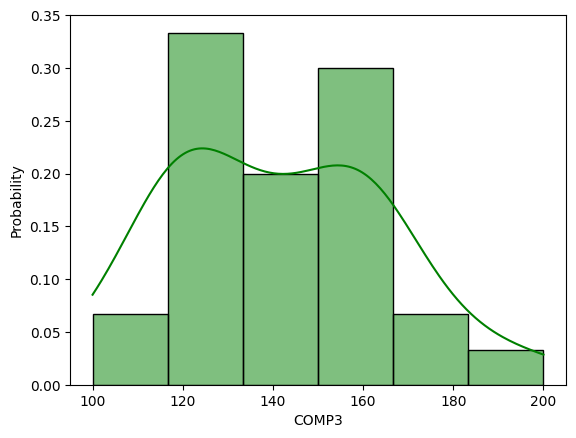

In [27]:
sns.histplot(colegioy, x='COMP3', bins=6, color="green", kde=True, stat="probability"); # visível falha na normalidade

In [28]:
import scipy.stats as stats
import matplotlib.pyplot as plt

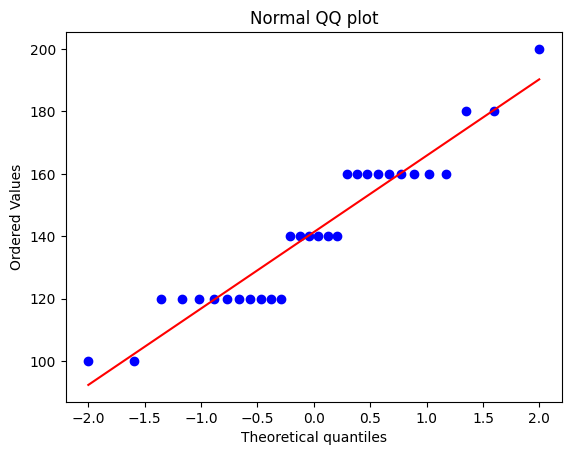

In [29]:
stats.probplot(colegioy['COMP3'], dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

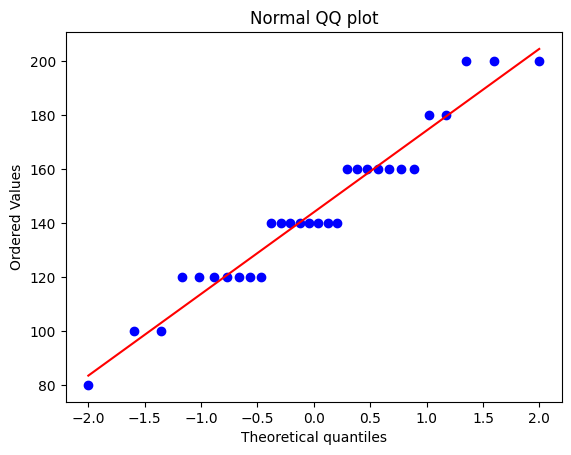

In [30]:
stats.probplot(colegioy['COMP5'], dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

5) Homogeneidade das variâncias (homocedasticidade)

Variabilidade dos erros constante.

O quão dispersas estão as variâncias.

Tem que ser o mais constante possível e não concentrada em determinados pontos.

Hipóteses:
- Ho = variâncias homogêneas : p > 0,05 
- Ha = variâncias não homogêneas : p <= 0,05

In [31]:
# teste de Levene
from scipy.stats import levene # analisar numericamente a variância

In [32]:
stat, p = levene(colegioy.COMP3, colegioy.COMP5, center='mean') # center='mean' pensando em um teste paramétrico, já que é em função da média!!
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p.round(10))) # p > 0,05, então passou no teste de homocedasticidade

Estatística de teste: 0.61
p-valor: 0.4382667191


Agooooraa.... Tste t-student!

Uma comparação para média das notas dos componentes 3 e 5 da redação do colégio Y.

- Ho = NÃO há diferença entre as médias dos componentes : p > 0.05
- Ha = Há diferença entre as médias dos componentes : p <= 0.05

In [33]:
import scipy.stats as stats

In [34]:
stat, p = stats.ttest_ind(colegioy['COMP3'], colegioy['COMP5'], equal_var=True) # equal_var = passou no teste de homocedasticidade
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p.round(10))) # p > 0.05 então estatisticamente, devemos apoiar Ho

Estatística de teste: -0.38
p-valor: 0.7073512583


In [35]:
colegioy.COMP3.describe()

count     30.000000
mean     141.333333
std       24.597916
min      100.000000
25%      120.000000
50%      140.000000
75%      160.000000
max      200.000000
Name: COMP3, dtype: float64

In [36]:
colegioy.COMP5.describe()

count     30.000000
mean     144.000000
std       29.896373
min       80.000000
25%      120.000000
50%      140.000000
75%      160.000000
max      200.000000
Name: COMP5, dtype: float64

**INTERPRETAÇÃO:**

Teste estatístico: -0,38

p_valor = 0,707

Conclusão: Estatisticamente, com intervalo de confiança de 95%, a média do componente 3 de redação não é diferente da média do componente 5 com relação ao colegio y. 

